<a href="https://colab.research.google.com/github/minhtrong20130448/ML/blob/main/Lab_4_20130448_NguyenMinhTrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab4'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab4


In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2 2 1 0 1 1 0 2 2 0 0 0 2 0 1 2 1 2 2 0 2 0 0 0 0 1 1 0 0 0]


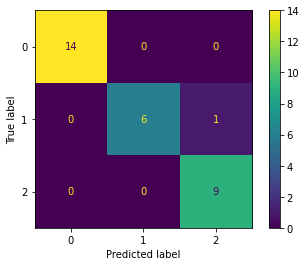

In [17]:
classifier = LogisticRegression(random_state = 0) 

dataset = datasets.load_iris()
X = dataset.data
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
classifier.fit(X_train, Y_train)
print(Y_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


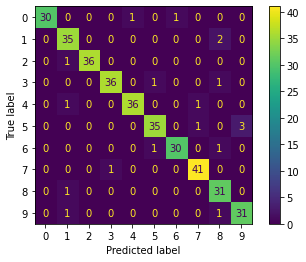

In [ ]:
mnist = datasets.load_digits()

# Load bộ dữ liệu load_digits
digits = datasets.load_digits()

# Chia data thành feature và target
X = digits.data
y = digits.target

# Chia dữ liệu thành tập huấn luyện và tập thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Khởi tạo mô hình logistic regression
clf = LogisticRegression()

# Huấn luyện mô hình logistic regression
clf.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu thử nghiệm
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Best k = 1
Kết quả mô hình kNN với k tốt nhất:
Accuracy:  0.9666666666666667
Precision:  0.9696969696969697
Recall:  0.9761904761904763
F1-Score:  0.9717813051146384

 Kết quả mô hình Logistic Regression:
Accuracy:  0.9333333333333333
Precision:  0.9444444444444445
Recall:  0.9523809523809524
F1-Score:  0.9440559440559441


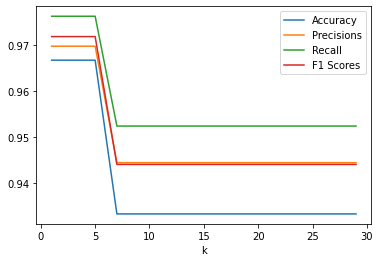

In [60]:
from numpy import average
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#load dữ liệu
iris = datasets.load_iris()

# Chia data thành feature và target
X = iris.data
y = iris.target
# Chia dữ liệu thành tập huấn luyện và tập thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Khởi tạo danh sách các giá trị k cần thử
k_values = range(1, 30, 2)

# Duyệt qua các giá trị k và tìm giá trị tốt nhất
best_k = None
best_acc = 0.0

accuracys_kNN = []
precisions_kNN = []
recalls_kNN = []
F1Scores_kNN = []

for k in k_values:
    # Khởi tạo mô hình kNN với k cho trước
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Huấn luyện mô hình trên tập huấn luyện
    clf.fit(X_train, y_train)
    
    # Dự đoán nhãn của tập thử nghiệm
    y_pred = clf.predict(X_test)
    
    # Đánh giá độ chính xác của mô hình
    acc = accuracy_score(y_test, y_pred)
    
    accuracys_kNN.append(acc)
    precisions_kNN.append(precision_score(y_test, y_pred, average='macro'))
    recalls_kNN.append(recall_score(y_test, y_pred, average='macro'))
    F1Scores_kNN.append(f1_score(y_test, y_pred, average='macro'))

    # Nếu độ chính xác tốt hơn giá trị tốt nhất hiện tại, 
    # cập nhật giá trị tốt nhất và k tương ứng
    if acc > best_acc:
        best_acc = acc
        best_k = k

# In ra giá trị k tốt nhất và độ chính xác tương ứng trên tập thử nghiệm
print("Best k =", best_k)

# Vẽ chart kNN
plt.plot(k_values, accuracys_kNN, label="Accuracy")
plt.plot(k_values, precisions_kNN, label="Precisions")
plt.plot(k_values, recalls_kNN, label="Recall")
plt.plot(k_values, F1Scores_kNN, label="F1 Scores")
plt.xlabel("k")
plt.legend()

# Xây dựng và huấn luyện mô hình kNN với k tốt nhất
knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


# Tính toán độ chính xác, độ thu hồi, độ đo f1 cho mô hình kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# Xây dựng và huấn luyện mô hình Logistic Regression
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
y_pred_logistic = logistic_clf.predict(X_test)

# Tính toán độ chính xác, độ thu hồi, độ đo f1 cho mô hình Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='macro')
recall_logistic = recall_score(y_test, y_pred_logistic, average='macro')
f1_logistic = f1_score(y_test, y_pred_logistic, average='macro')

# So sánh kết quả giữa mô hình kNN(k tốt nhất) với mô hình hồi quy logistic
print("Kết quả mô hình kNN với k tốt nhất:")
print("Accuracy: ", accuracy_knn)
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1-Score: ", f1_knn)

print("\nKết quả mô hình Logistic Regression:")
print("Accuracy: ", accuracy_logistic)
print("Precision: ", precision_logistic)
print("Recall: ", recall_logistic)
print("F1-Score: ", f1_logistic)


#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


Best k = 1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Kết quả mô hình kNN với k tốt nhất:
Accuracy:  0.9833333333333333
Precision:  0.9837658191106468
Recall:  0.9833333333333333
F1-Score:  0.9833100967584731

 Kết quả mô hình Logistic Regression:
Accuracy:  0.9638888888888889
Precision:  0.9644220165667194
Recall:  0.9638888888888889
F1-Score:  0.9638890517591765


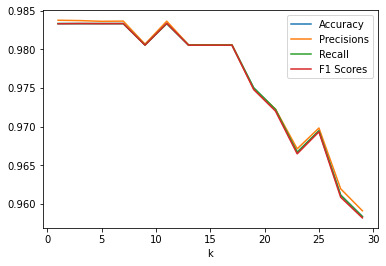

In [33]:
# Load bộ dữ liệu digits
digits = datasets.load_digits()

# Chia data thành feature và target
X = digits.data
y = digits.target

# Chia dữ liệu thành tập huấn luyện và tập thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Khởi tạo danh sách các giá trị k cần thử
k_values = range(1, 30, 2)

# Duyệt qua các giá trị k và tìm giá trị tốt nhất
best_k = None
best_acc = 0.0

accuracys_kNN = []
precisions_kNN = []
recalls_kNN = []
F1Scores_kNN = []

for k in k_values:
    # Khởi tạo mô hình kNN với k cho trước
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Huấn luyện mô hình trên tập huấn luyện
    clf.fit(X_train, y_train)
    
    # Dự đoán nhãn của tập thử nghiệm
    y_pred = clf.predict(X_test)
    
    # Đánh giá độ chính xác của mô hình
    acc = accuracy_score(y_test, y_pred)
    
    accuracys_kNN.append(acc)
    precisions_kNN.append(precision_score(y_test, y_pred, average='weighted'))
    recalls_kNN.append(recall_score(y_test, y_pred, average='weighted'))
    F1Scores_kNN.append(f1_score(y_test, y_pred, average='weighted'))

    # Nếu độ chính xác tốt hơn giá trị tốt nhất hiện tại, 
    # cập nhật giá trị tốt nhất và k tương ứng
    if acc > best_acc:
        best_acc = acc
        best_k = k

# In ra giá trị k tốt nhất và độ chính xác tương ứng trên tập thử nghiệm
print("Best k =", best_k)

# Vẽ chart kNN
plt.plot(k_values, accuracys_kNN, label="Accuracy")
plt.plot(k_values, precisions_kNN, label="Precisions")
plt.plot(k_values, recalls_kNN, label="Recall")
plt.plot(k_values, F1Scores_kNN, label="F1 Scores")
plt.xlabel("k")
plt.legend()

# Xây dựng và huấn luyện mô hình kNN với best_k
knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Tính toán độ chính xác, độ thu hồi, độ chính xác cân bằng, độ thu hồi cân bằng và f1-score của mô hình kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Xây dựng và huấn luyện mô hình Logistic Regression
logistic_clf = LogisticRegression(max_iter=1000)
logistic_clf.fit(X_train, y_train)
y_pred_logistic = logistic_clf.predict(X_test)

# Tính toán độ chính xác, độ thu hồi, độ chính xác cân bằng, độ thu hồi cân bằng và f1-score của mô hình Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

# So sánh kết quả
print("Kết quả mô hình kNN với k tốt nhất:")
print("Accuracy: ", accuracy_knn)
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1-Score: ", f1_knn)

print("\nKết quả mô hình Logistic Regression:")
print("Accuracy: ", accuracy_logistic)
print("Precision: ", precision_logistic)
print("Recall: ", recall_logistic)
print("F1-Score: ", f1_logistic)

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Results:
Accuracy:  0.9185667752442996
Precision:  0.92
Recall:  0.8846153846153846
F1-Score:  0.9019607843137256

K-Nearest Neighbors Results:
Accuracy:  0.7904451682953312
Precision:  0.7743732590529248
Recall:  0.7128205128205128
F1-Score:  0.7423230974632844

Logistic Regression Results:
Accuracy:  0.9261672095548317
Precision:  0.9214659685863874
Recall:  0.9025641025641026
F1-Score:  0.9119170984455959


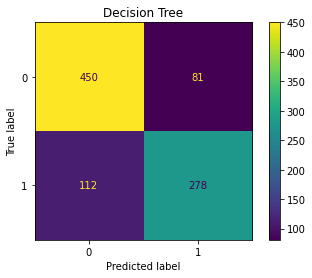

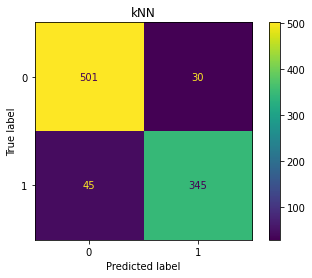

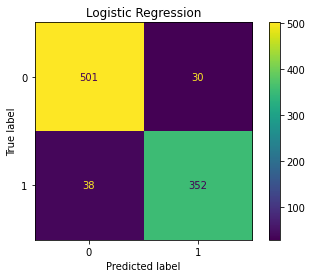

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
# Load bộ dữ liệu Spambase
data = pd.read_csv('spambase.csv')

# Chia data thành feature và target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Confusion matrix dt
cm_dt = confusion_matrix(y_test, y_pred_knn)

# Hiển thị confusion matrix dt
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
disp_dt.ax_.set_title("Decision Tree")

# Tính toán các thước đo đánh giá mô hình Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Huấn luyện mô hình kNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Confusion matrix kNN
cm_kNN = confusion_matrix(y_test, y_pred_dt)

# Hiển thị confusion matrix kNN
disp_kNN = ConfusionMatrixDisplay(confusion_matrix=cm_kNN)
disp_kNN.plot()
disp_kNN.ax_.set_title("kNN")

# Tính toán các thước đo đánh giá mô hình kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Huấn luyện mô hình Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Confusion matrix dt
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Hiển thị confusion matrix dt
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot()
disp_logistic.ax_.set_title("Logistic Regression")

# Tính toán các thước đo đánh giá mô hình Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


# Kết quả các thước đo đánh giá của ba mô hình
print("Kết quả mô hình Decision Tree:")
print("Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1-Score: ", f1_dt)

print("\n Kết quả mô hình kNN:")
print("Accuracy: ", accuracy_knn)
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1-Score: ", f1_knn)

print("\n Kết quả mô hình Logistic Regression:")
print("Accuracy: ", accuracy_logistic)
print("Precision: ", precision_logistic)
print("Recall: ", recall_logistic)
print("F1-Score: ", f1_logistic)


#Finally,
Save a copy in your Github. Remember renaming the notebook.